In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [2]:
# Import data
df = pd.read_csv('datainflasi.csv')
df.head()

,date,value
0,2000-01,1.32
1,2000-02,0.07
2,2000-03,0.45
3,2000-04,0.56
4,2000-05,0.84


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    240 non-null    object 
 1   value   240 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [4]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.340298
p-value: 0.000000


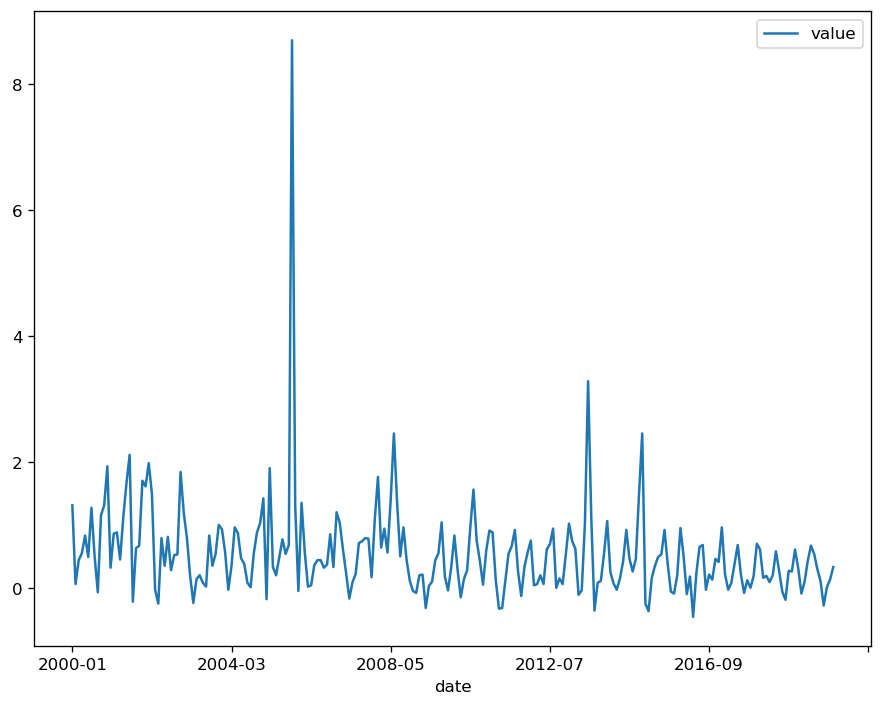

In [5]:
df.plot.line(x = 'date', y = 'value')
plt.show()

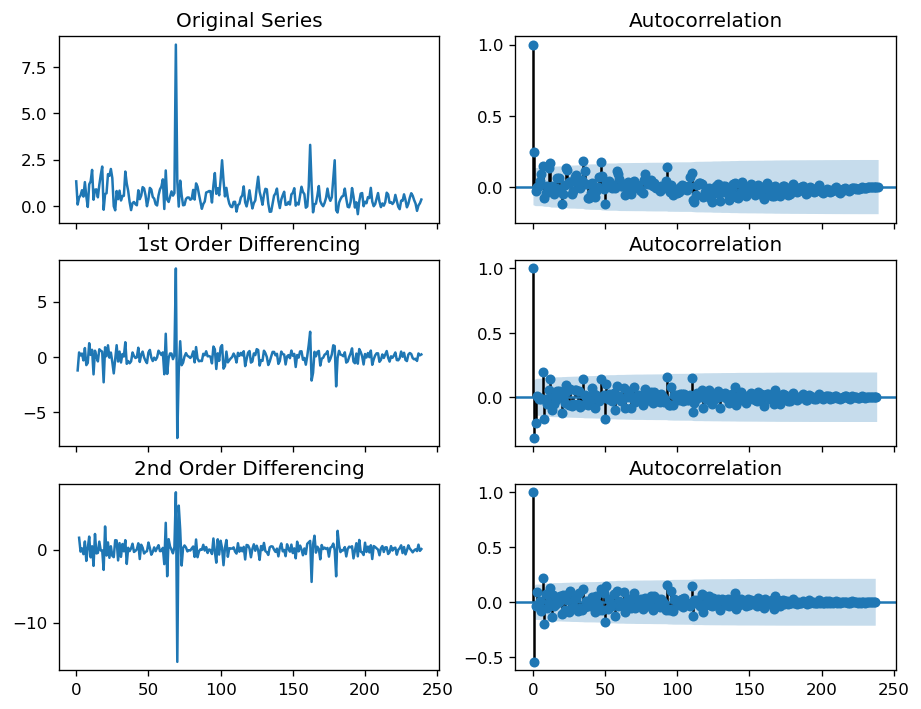

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')

# plot_acf(df.value, ax=axes[0, 1])
plot_acf(df.value, ax=axes[0, 1], lags=df.value.shape[0] - 1)

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')

#plot_acf(df.value.diff().dropna(), ax=axes[1, 1])
plot_acf(df.value.diff().dropna(), ax=axes[1, 1], lags=df.value.shape[0] - 2)

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1], lags=df.value.shape[0] - 3)


plt.show()

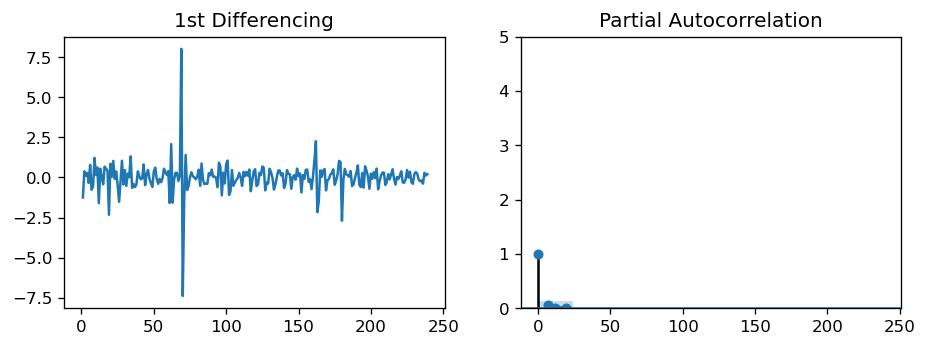

In [51]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

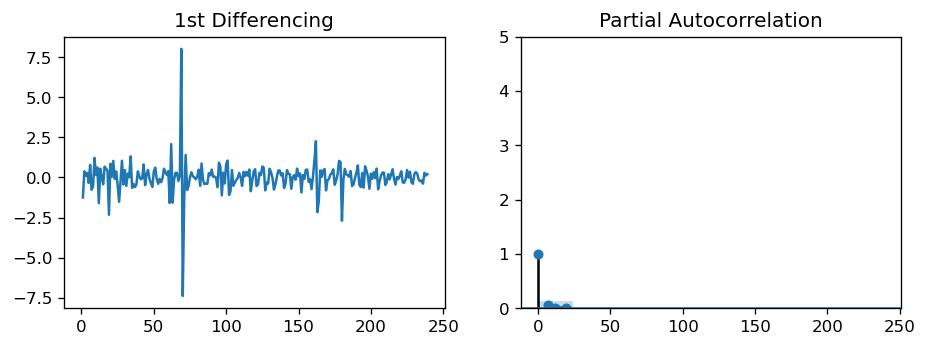

In [58]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [32]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  239
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -266.055
Method:                       css-mle   S.D. of innovations              0.729
Date:                Fri, 11 Dec 2020   AIC                            540.109
Time:                        17:13:04   BIC                            554.015
Sample:                             1   HQIC                           545.713
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0027      0.001     -3.158      0.002      -0.004      -0.001
ar.L1.D.value     0.2029      0.064      3.196      0.001       0.078       0.327
ma.L1.D.value    -1.0000      0.011    -

In [33]:
# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  239
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -264.198
Method:                       css-mle   S.D. of innovations              0.723
Date:                Fri, 11 Dec 2020   AIC                            538.395
Time:                        17:13:05   BIC                            555.778
Sample:                             1   HQIC                           545.400
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0027      0.001     -3.384      0.001      -0.004      -0.001
ar.L1.D.value    -0.2939      0.342     -0.859      0.390      -0.964       0.377
ma.L1.D.value    -0.4735      0.312     

C:\Users\Gah\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


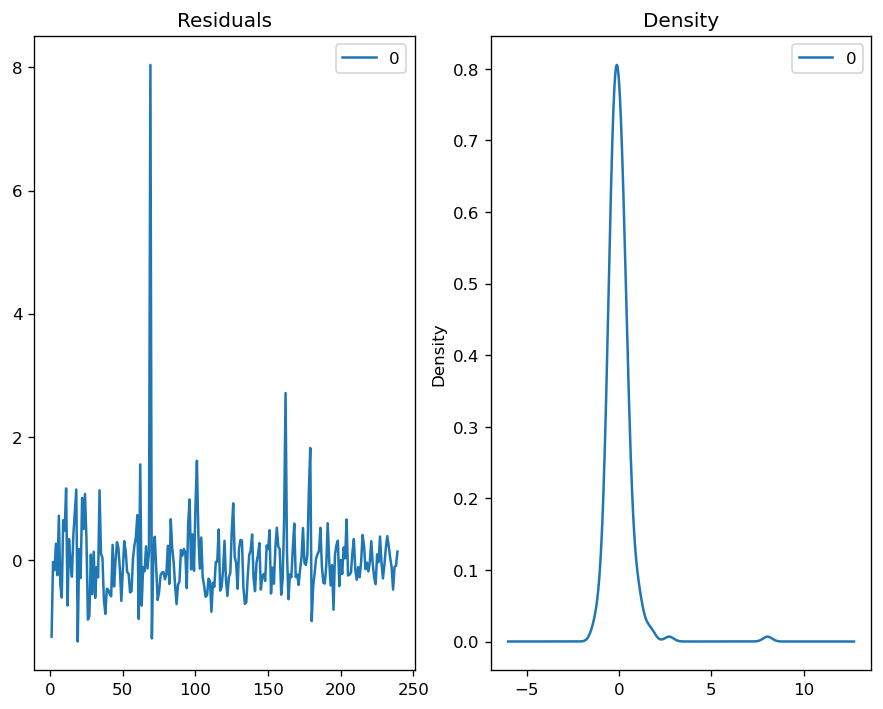

In [34]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

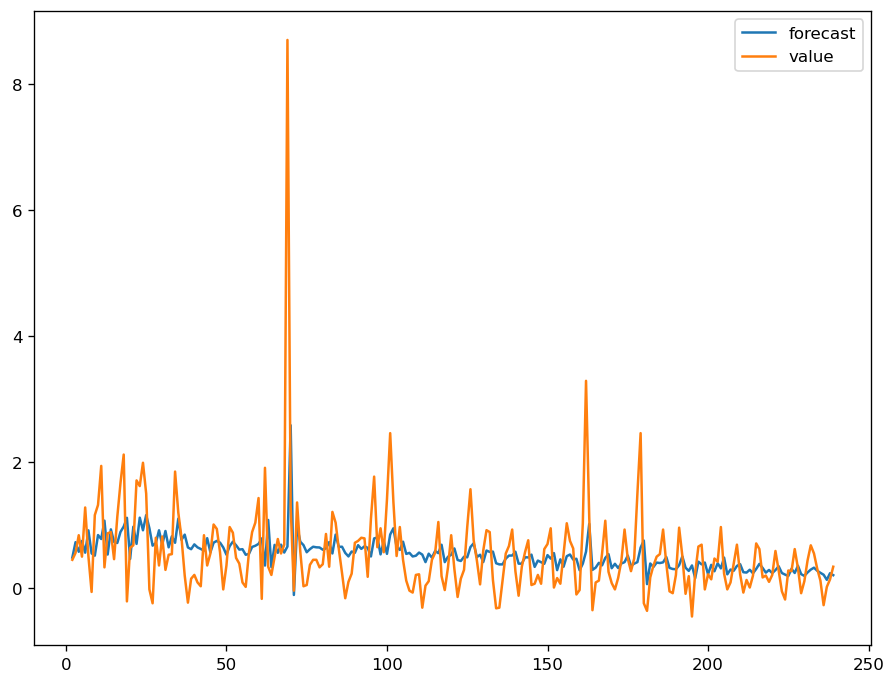

In [35]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [36]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:140]
test = df.value[100:]

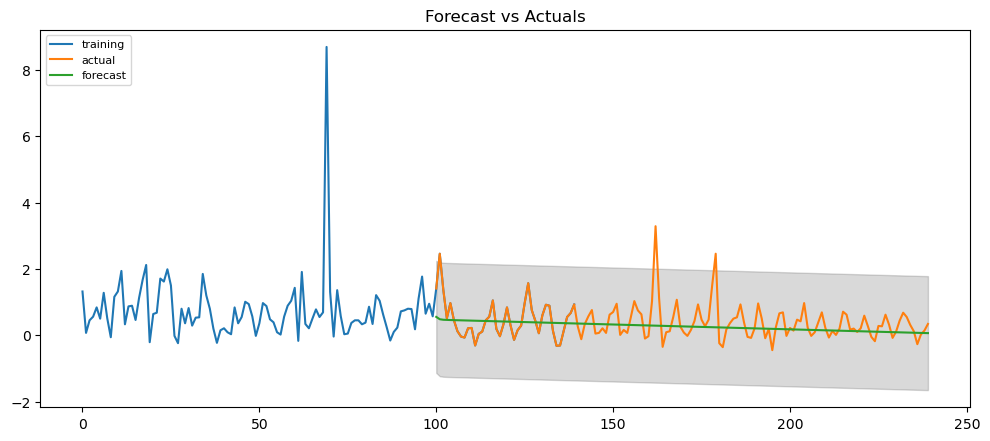

In [38]:
# Build Model

model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(140, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  140
Model:                     ARMA(0, 1)   Log Likelihood                -178.161
Method:                       css-mle   S.D. of innovations              0.864
Date:                Fri, 11 Dec 2020   AIC                            362.323
Time:                        17:13:26   BIC                            371.148
Sample:                             0   HQIC                           365.909
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6800      0.088      7.717      0.000       0.507       0.853
ma.L1.value     0.2086      0.086      2.412      0.016       0.039       0.378
                                    Roots       

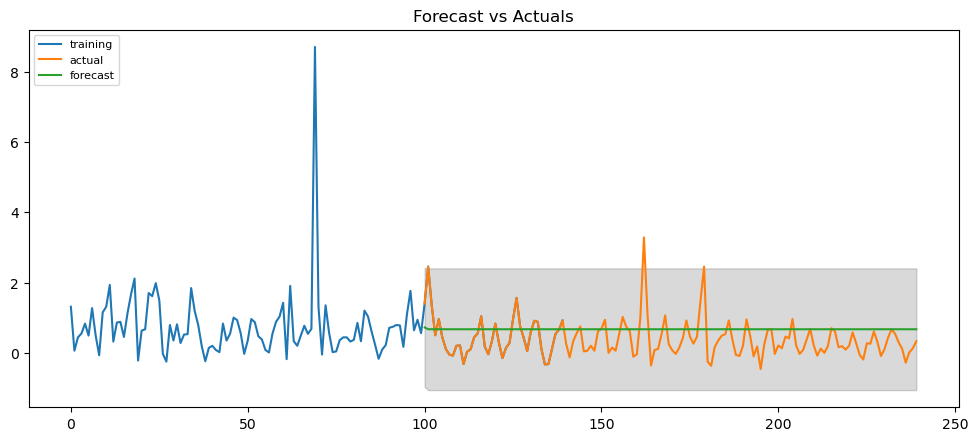

In [39]:
# Build Model
model = ARIMA(train, order=(0, 0, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(140, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [40]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

C:\Users\Gah\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 4.888840190830789,
 'me': 0.27644680704886754,
 'mae': 0.47970063168985877,
 'mpe': 0.4841988544111522,
 'rmse': 0.5974237150287942,
 'acf1': 0.40926750905519177,
 'corr': 0.16091496764795593,
 'minmax': 0.623830280703494}

In [41]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=555.256, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=654.583, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=587.419, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=602.353, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=546.751, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=587.329, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=544.895, Time=0.34 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=579.657, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=545.775, Time=0.47 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=545.279, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=543.917, Time=0.67 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=543.502, Time=0.39 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=543.191, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=541.458, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=556.3

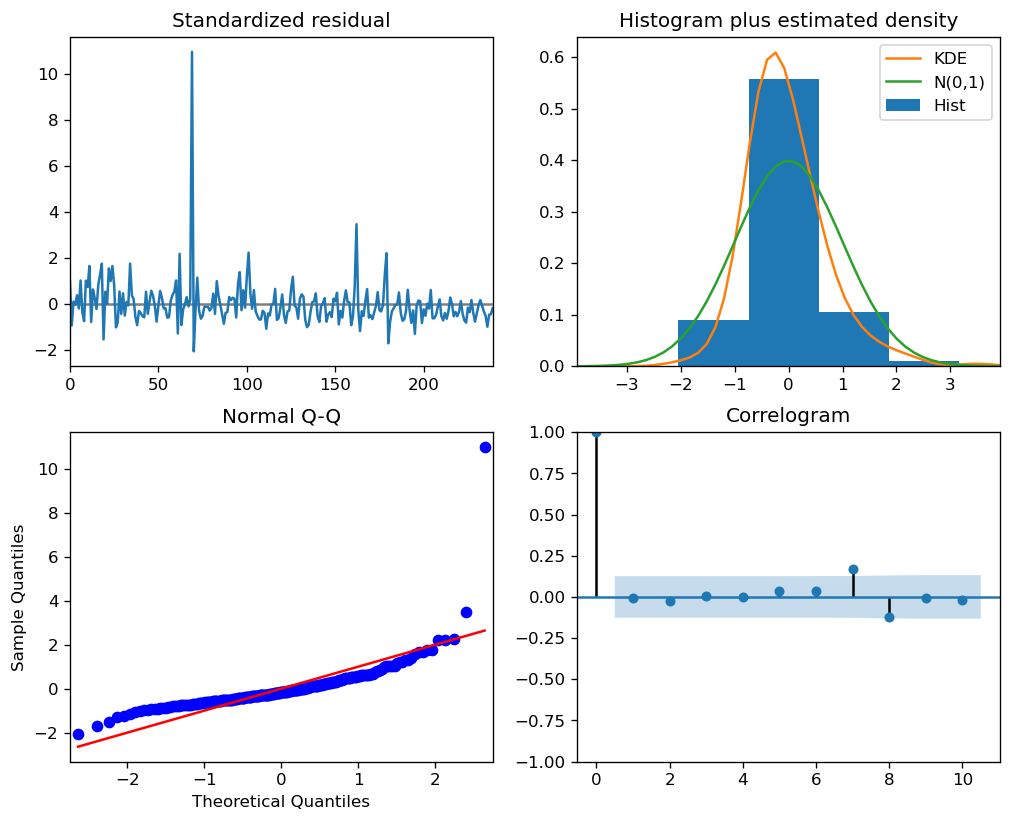

In [42]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

In [43]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

C:\Users\Gah\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 4.888840190830789,
 'me': 0.27644680704886754,
 'mae': 0.47970063168985877,
 'mpe': 0.4841988544111522,
 'rmse': 0.5974237150287942,
 'acf1': 0.40926750905519177,
 'corr': 0.16091496764795593,
 'minmax': 0.623830280703494}

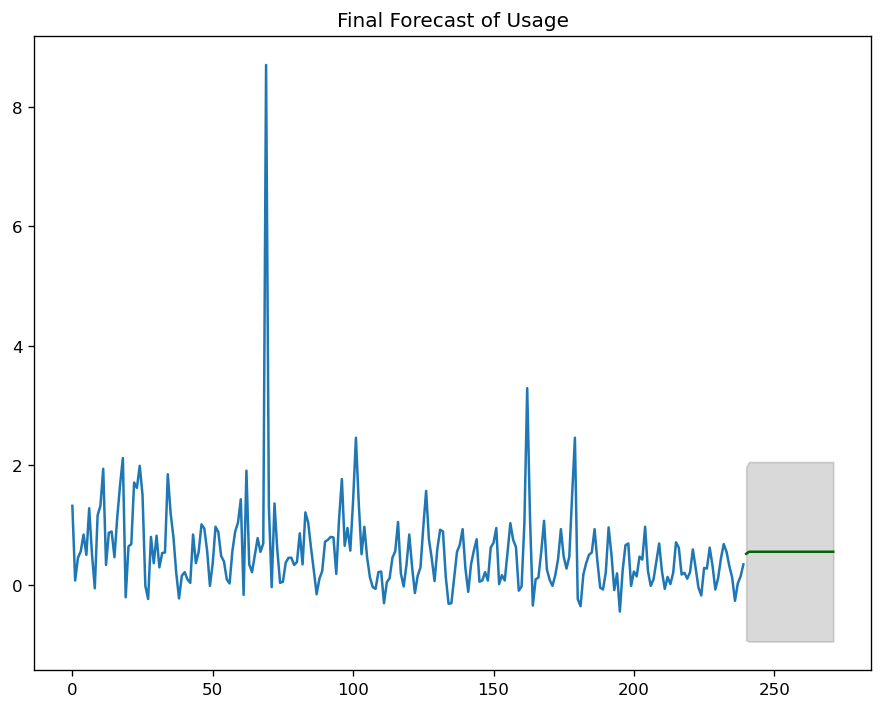

In [44]:
# Forecast
n_periods = 32
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

In [45]:
fc_series.tail(32)

240    0.517222
241    0.551398
242    0.551398
243    0.551398
244    0.551398
245    0.551398
246    0.551398
247    0.551398
248    0.551398
249    0.551398
250    0.551398
251    0.551398
252    0.551398
253    0.551398
254    0.551398
255    0.551398
256    0.551398
257    0.551398
258    0.551398
259    0.551398
260    0.551398
261    0.551398
262    0.551398
263    0.551398
264    0.551398
265    0.551398
266    0.551398
267    0.551398
268    0.551398
269    0.551398
270    0.551398
271    0.551398
dtype: float64

In [47]:
# # Plot
# fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=200, sharex=True)

# # Usual Differencing
# axes[0].plot(data[:], label='Original Series')
# axes[0].plot(data[:].diff(1), label='Usual Differencing')
# axes[0].set_title('Usual Differencing')
# axes[0].legend(loc='upper left', fontsize=10)


# # Seasonal Differencing
# axes[1].plot(data[:], label='Original Series')
# axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
# axes[1].set_title('Seasonal Differencing')
# plt.legend(loc='upper left', fontsize=10)
# plt.suptitle('Inflasti , Time series dataset', fontsize=16)
# plt.show()

In [48]:
import pmdarima as pm

In [49]:
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.69 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=648.606, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=587.335, Time=0.44 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=646.836, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=640.231, Time=0.13 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=566.324, Time=1.25 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.17 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.82 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=569.738, Time=0.61 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=566.839, Time=1.27 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=565.646, Time=2.49 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=586.418, Time=0.67 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=7.08 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  240
Model:             SARIMAX(0, 0, 1)x(2, 1, [], 12)   Log Likelihood                -278.197
Date:                             Fri, 11 Dec 2020   AIC                            564.393
Time:                                     17:14:47   BIC                            578.111
Sample:                                          0   HQIC                           569.928
                                             - 240                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1879      0.051      3.698      0.000       0.088       0.287
ar.S.L12      -0.6017      0.023    -25.706      0.000      -0.648      -0.556
ar.S.L24      -0.2972      0.024    -12.219      0.000      -0.345      -0.250
sigma2         0.6569      0.013     49.533      0.000       0.631       0.683
===================================================================================
Ljung-Box (Q):                       53.53   Jarque-Bera (JB):             19345.20
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                             4.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        47.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

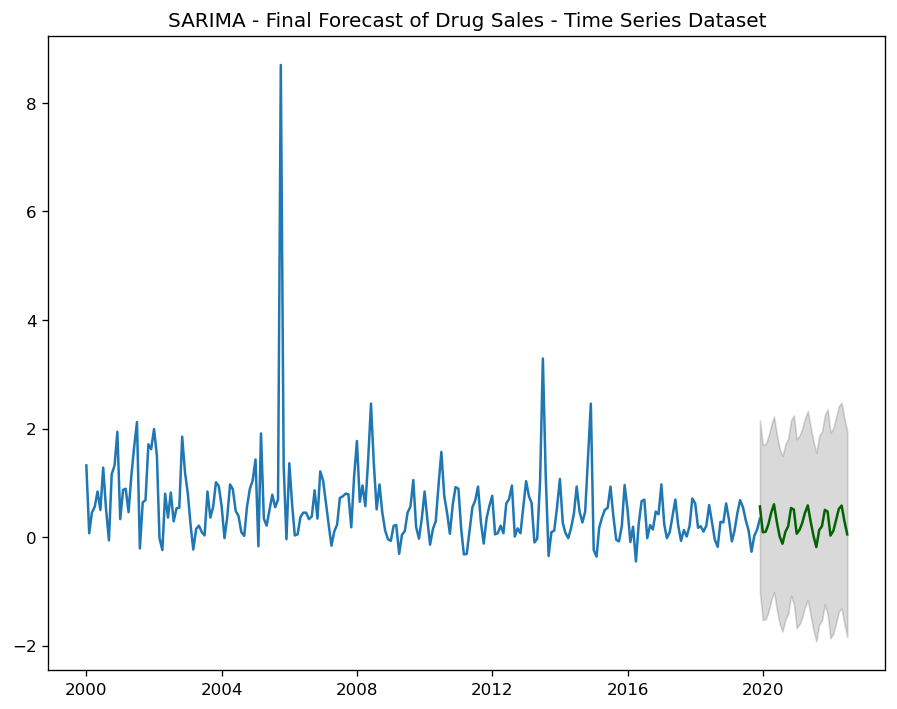

In [42]:
# Forecast
n_periods = 32
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

In [44]:
fitted_series.tail(32)

2019-12-01    0.563415
2020-01-01    0.088265
2020-02-01    0.098765
2020-03-01    0.232441
2020-04-01    0.450690
2020-05-01    0.603792
2020-06-01    0.274114
2020-07-01    0.011762
2020-08-01   -0.123704
2020-09-01    0.096197
2020-10-01    0.197418
2020-11-01    0.535234
2020-12-01    0.506114
2021-01-01    0.061323
2021-02-01    0.132276
2021-03-01    0.256277
2021-04-01    0.448974
2021-05-01    0.583313
2021-06-01    0.286791
2021-07-01    0.026363
2021-08-01   -0.184984
2021-09-01    0.127627
2021-10-01    0.201508
2021-11-01    0.500981
2021-12-01    0.468244
2022-01-01    0.027522
2022-02-01    0.115451
2022-03-01    0.303627
2022-04-01    0.518164
2022-05-01    0.579647
2022-06-01    0.289829
2022-07-01    0.049748
Freq: MS, dtype: float64

In [91]:
data.tail()

,value
date,
2019-08-01,0.12
2019-09-01,-0.27
2019-10-01,0.02
2019-11-01,0.14
2019-12-01,0.34
